<a href="https://colab.research.google.com/github/Eitams/DLV_recycling/blob/main/DeepRecycling_model5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project - Deep Recycling
*Authors: Eitam Shafran, Hossam Fahmy and Nathan Rohrbach*


---

## Introduction
The goal of this project is to create an algorithm that will recognize the different type of waste so it can be recycled correctly. We use the TACO dataset, an open source image dataset of waste in the wild. We use the Mask_RCNN network from Matterport to detect and classify the images in the different trash category (plastic, glass, can, ...).
### References
+ https://github.com/matterport/Mask_RCNN: We will use the pretrained model from this repository and then retrained it with our own trash classes/labels
+ http://tacodataset.org/: TACO website, with useful information about the dataset, some statistics, GitHub repo and more. Mainly used to get the data.

###Structure
0. *Download data*
1. *Set UP*
  + Filter and split dataset
  + Import Mask_RCNN repositories and download requiremts
2. *Training*
  + Custom config and dataset 
  + Run
  + TensorBoard
3. *Evaluate*
  + Visual Check
  + mAP
4. *Test*

### Remark:

TACO annotation files has more than 60 categories, due to the complexity and the expensive computer resource it requires, we have decided to reduce the number of classes to 28. Actually, we use the 'supercategory' as the class name, for this modification, we used a python script that transfom the original annotation file `annotation.json` with the 60 categories to a simplified version with 28 categories `simplified_annotations.json`.

You can find the script in the Google drive folder:
https://drive.google.com/drive/folders/1rBGwrHzXDPx0t1G2MpHyeYgLuO4w5fT4?usp=sharing





> *If you don't intend to train the network, ignore the cells with the comment 'PASS'.*






In [ ]:
import sys
import os



---


## 0. Download data

We alread download the data on Google Drive, you can find it in the following directory `./TACO/data` (images + annotations file).

Otherwise, you can dowload it through the TACO repository, follow the README.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive




---


## 1. Set Up
First we will filter the dataset, then split in train and test set, finally import the Mask_RCNN and proceed the different installations. 


### 1.1 Filter dataset


We filter the dataset with the help of repository that manage COCO annotation files. We use this filter to reduce the size of the dataset, because as you will see the class distribution can be heavily unbalanced. 

You will find 2 filtering command. 

In [ ]:
#PASS
!git clone https://github.com/immersive-limit/coco-manager.git

`simplified_annoations.json`: annotation file with 28 categories (input)

`annotation.json`: original annotation file with more than 60 categories

`annotation_filt.json`: filtered annotation file with 28 categories (output 1)

`annotation_filt_9.json`: filtered annotation file with 9 categories (output 2)

In [ ]:
#PASS
## filter original annotation json - select which categories to include and where to store
!python /content/coco-manager/filter.py \
--input_json /content/drive/MyDrive/project/DeepRecycling/TACO/data/simplified_annotations.json \
--output_json /content/drive/MyDrive/project/DeepRecycling/TACO/data/annotations_filt.json \
--categories 'Aluminium foil' 'Battery' 'Blister pack' 'Bottle' 'Bottle cap'\
 'Broken glass' 'Can' 'Carton' 'Cup' 'Food waste' 'Glass jar' 'Lid'\
 'Other plastic' 'Paper' 'Paper bag' 'Plastic bag & wrapper'\
  'Plastic container' 'Plastic glooves' 'Plastic utensils' 'Pop tab'\
  'Rope & strings' 'Scrap metal' 'Shoe' 'Squeezable tube' 'Straw'\
  'Styrofoam piece' 'Unlabeled litter' 'Cigarette'


In [ ]:
#PASS
!python /content/coco-manager/filter.py \
--input_json /content/drive/MyDrive/project/DeepRecycling/TACO/data/simplified_annotations.json \
--output_json /content/drive/MyDrive/project/DeepRecycling/TACO/data/annotations_filt_9.json \
--categories 'Bottle' 'Bottle cap' 'Broken glass' 'Can' 'Carton' 'Cup' \
 'Paper' 'Plastic bag & wrapper' 'Cigarette'



---


### 1.2 Split dataset train/test

Here, we also use a repository to split the annoation file in accordance to COCO format. 

In [ ]:
#PASS
!git clone https://github.com/akarazniewicz/cocosplit.git

In [ ]:
#PASS
os.chdir("./content/cocosplit")
!pip install -r requirements.txt

You need to `Restart Runtime` and then check the correct directory with the next cell

The following command will split the dataset on 80% train and 20% test. The output is two different JSON file for the training and testing ground truth (annotation file).

In [ ]:
#PASS
os.chdir("./content/cocosplit")
!python cocosplit.py --having-annotations \
-s 0.8 \
"/content/drive/MyDrive/project/DeepRecycling/TACO/data/annotations_filt.json" "/content/drive/MyDrive/project/DeepRecycling/TACO/data/train.json" "/content/drive/MyDrive/project/DeepRecycling/TACO/data/test.json"

In [ ]:
#PASS
!python cocosplit.py --having-annotations \
-s 0.8 \
"/content/drive/MyDrive/project/DeepRecycling/TACO/data/annotations_filt_9.json" "/content/drive/MyDrive/project/DeepRecycling/TACO/data/train9.json" "/content/drive/MyDrive/project/DeepRecycling/TACO/data/test9.json"



---


### 1.3 Install Mask_RCNN

In the following section, we will set up the Mask_RCNN repositories, download the pre-trained weights from MS COCO and downgrade some packages in order to run the script whitout errors. You might need to `RESTART RUNTIME`, make sure you are in the right directory before running other cells. 

In [ ]:
# Make sure you are in the './content/' directory
%cd ./

/content


In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 21.34 MiB/s, done.
Resolving deltas: 100% (565/565), done.


In [ ]:
os.chdir("./Mask_RCNN")
!pip3 install -r requirements.txt 
!python3 setup.py install 

In [ ]:
## Making sure the packege was installed correctly
!pip3 show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg
Requires: 
Required-by: 


In [ ]:
## Restart kernel after installing it!
!pip install 'h5py==2.10.0' --force-reinstall
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.2.5

Download COCO weights, already included in the Google drive folder.

In [ ]:
## Download h5 file if didnt yet
# os.chdir('/content/drive/MyDrive/project/DeepRecycling/TACO/')
# ## Download Model pretrained Weights
# !wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5



---

## 2. Inspect dataset

A short inspection of the dataset:
+ Number of images in the train and test set
+ Number of classes
+ Class distribution

We use two different dataset, one with 28 categories and one with the 9 largest class, change the directory to investigate the different dataset. 

In [ ]:
import os
import sys
import json
import numpy as np
import random
import datetime as dt

import matplotlib.pyplot as plt
import skimage.draw

In [ ]:
DATA_DIR = "/content/drive/MyDrive/project/DeepRecycling/TACO/data"

In [ ]:
# Get annotation files to get the number of categories 
train_data=json.load(open(os.path.join(DATA_DIR,"train9.json")))     # change here for train.json or train9.json
test_data=json.load(open(os.path.join(DATA_DIR,"test9.json")))       # change here for test.json or test9.json
categories=train_data["categories"]
test_categories=train_data["categories"]
if categories == test_categories:
  number_categories=len(categories)
  print(f"There is {number_categories} categories in the dataset\n")

dict_data={}
classes=[]
test_class=[]
train_class=[]
for cat in train_data["categories"]:
  classes.append(cat["name"])
  class_id=cat["id"]

  count_class_train=0
  for annot in train_data["annotations"]:
    if annot["category_id"]==class_id:
      count_class_train+=1
  train_class.append(count_class_train)

  count_class_test=0
  for annot in test_data["annotations"]:
    if annot["category_id"]==class_id:
      count_class_test+=1
  test_class.append(count_class_test)


dict_data["class_names"]=classes
dict_data["train"]=train_class
dict_data["test"]=test_class

assert len(classes)==len(train_class)==len(test_class), "Warnings: uneven number of class in the sets"

num_images_train = len(train_data["images"])
tot_annot_train = sum(train_class)
avg_train=tot_annot_train/num_images_train
num_images_test = len(test_data["images"])
tot_annot_test = sum(test_class)
avg_test=tot_annot_test/num_images_test
print(f"There is {num_images_train} images in the train dataset")
print(f"Average annotation per images {round(avg_train,2)} (train)\n")
print(f"There is {num_images_test} images in the test dataset")
print(f"Average annotation per images {round(avg_test,2)} (test)\n")
print(f"There is a total of {num_images_test+num_images_train} images in the dataset")

There is 9 categories in the dataset

There is 1007 images in the train dataset
Average annotation per images 2.54 (train)

There is 252 images in the test dataset
Average annotation per images 2.74 (test)

There is a total of 1259 images in the dataset


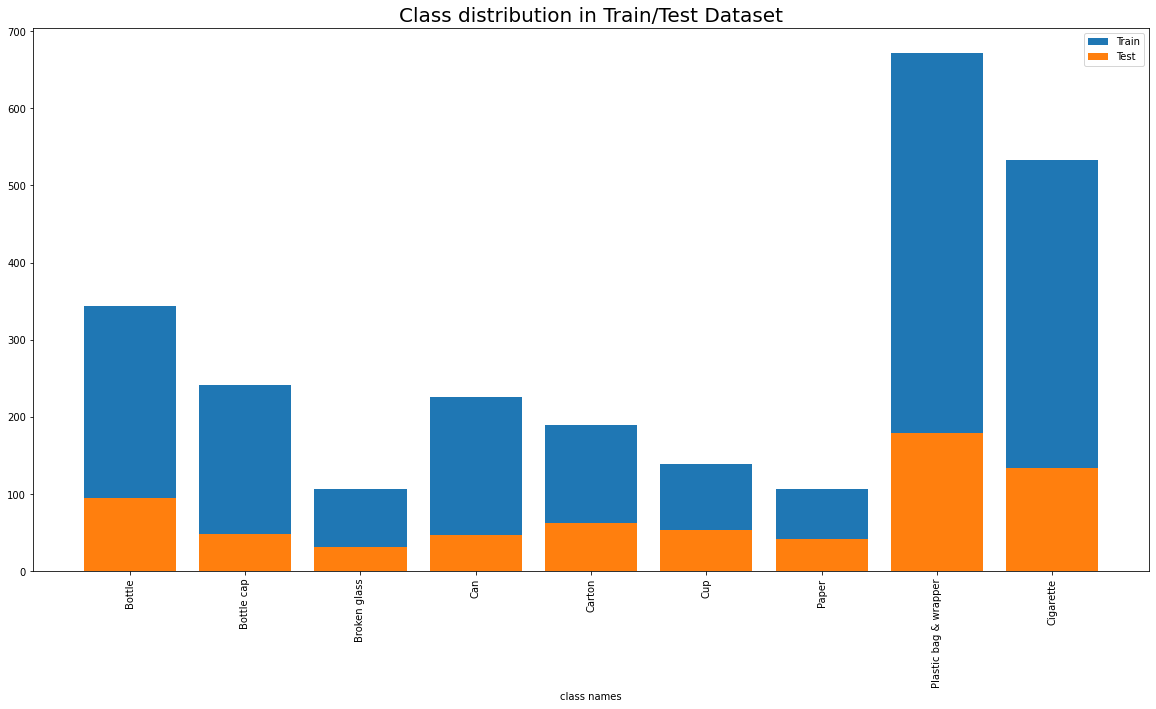

In [ ]:
# variables
x = dict_data["class_names"]
train = dict_data["train"]
test = dict_data["test"]

# Bar plot
fig = plt.figure(figsize = (20, 10))

X_axis = np.arange(len(x))
plt.bar(X_axis, train, 0.8, label = 'Train')
plt.bar(X_axis, test, 0.8, label = 'Test' )

plt.xticks(X_axis, x, rotation=90)
plt.xlabel("class names")
plt.title("Class distribution in Train/Test Dataset", fontsize=20)
plt.legend()
plt.show()

+ *28 categories*: As you might see the distribution of the class is heavily unbalanced. For this reason we use the other dataset containing the 9 largest class
+ *9 categories*: Again, the class are unbalanced, but due to the pictures in the dataset, it is hard to have balance the dataset. 


> *Example*: A picture can contain 9 cigarette butts and 1 piece of broken glass, therefore the cigarette class will be dominant on the broken glass class.





---


## 3. Training 

In this section we will train Mask_RCNN on our dataset with our 28 categories. The first steps consist in adapting our dataset `CustomDataset()`, so the model can run. Then, we need to set up the training configuration `CustomConfig()`. Finally, we will train the model and inspect the loss and other metrics in TensorBoard. 

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/project/DeepRecycling"

In [ ]:
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils

# Path to trained weights file
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "model_weights/mask_rcnn_coco.h5")   #coco weights directory

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

Using TensorFlow backend.


### 3.1 Custom training configuration

Some of the hyperparameter are set in Configuration Class, for instance:
+ Steps per epochs
+ Learning rates
+ Detection minimum threshold
+ Weight decay
+ ...

*Note:*

From Mask_RCNN it says "*The Mask RCNN paper uses lr=0.02, but on TensorFlow it causes weights to explode. Likely due to differences in optimizer implementation."*. Therefore, we set the learning rate quite low.

In [ ]:
train_data=json.load(open(os.path.join(DATA_DIR,"train9.json")))     # change here for train.json or train9.json
test_data=json.load(open(os.path.join(DATA_DIR,"test9.json")))       # change here for test.json or test9.json
categories=train_data["categories"]
test_categories=train_data["categories"]
if categories == test_categories:
  number_categories=len(categories)
  print(f"There is {number_categories} categories in the dataset\n")

There is 9 categories in the dataset



**/!\ Make sure to pass the correct number of categories, according to the model used!**

In [ ]:
class CustomConfig(Config):
    """Configuration for training on the custom  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "trash"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 2

    # Number of classes (including background)
    number_categories = 9                            ### CHANGE HERE!!!
    NUM_CLASSES = 1 + number_categories  

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    # IMAGE_MIN_DIM = 896
    # IMAGE_MAX_DIM = 896

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 1000

    # Skip detections with < X% confidence
    DETECTION_MIN_CONFIDENCE = 0.6

    # Learning Rate
    LEARNING_RATE = 0.001   

    # Weight Decay
    #WEIGHT_DECAY = 0.0001   

### 3.2 Custom Dataset

We need to write a custom dataset loader, so we can feed our dataset to Mask_RCNN and retrain it with our picture and segmentation. 

*inspired from the blog: https://haochen23.github.io/2020/06/fine-tune-mask-rcnn.html#.YqYuAxriuMo*


In [ ]:
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle

class CustomDataset(utils.Dataset):

    def load_custom(self, dataset_dir, subset):
        """
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
            
        train_json_file = os.path.join(dataset_dir, subset)
        coco = COCO(train_json_file)
        catIds = coco.getCatIds()
        categories = coco.loadCats(catIds)
            
        for cat in categories:
            self.add_class("trash", cat["id"], cat["name"])

        # train or test json
        dataset_path = os.path.join(dataset_dir, subset) 
       
        # We mostly care about the x and y coordinates of each region
        # assign train or test json to coco object
        coco = COCO(dataset_path)
        
        # read image ids
        imgIds = coco.getImgIds(catIds=[]) 
        nr_images_found = len(imgIds) 

        
        imgs = coco.loadImgs(imgIds)
        for img in imgs:
            image_id = img["id"]
            path = dataset_dir + '/' + img['file_name'] # 'batch_11/000001.jpg'
            width = img["width"]
            height = img["height"]

            ########
            ## transform segmentation to polygon
            ########
            # Load mask ids
            annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)

            anns_sel = coco.loadAnns(annIds)
            # Show annotations
            segmentation = []
            polygons = []
            category_id = []
            for ann in anns_sel:
                segmentation.append(ann["segmentation"])
                category_id.append(ann["category_id"])
                assert len(segmentation)==len(category_id)
            for seg in segmentation:
                xy = Polygon(np.array(seg[0]).reshape((int(len(seg[0])/2), 2))).get_xy()
                x = [x[0] for x in xy]
                y = [x[1] for x in xy]
                poly = {'all_points_x':x, 'all_points_y':y}
                polygons.append(poly)
            assert len(polygons) == len(category_id)
            
            self.add_image(
                    "trash",  ## for a single class just add the name here
                    image_id=image_id,  # use file name as a unique image id
                    path=path,
                    width=width, height=height,
                    polygons=polygons,
                    num_ids=category_id
                    )

    def load_mask(self, image_id):
        """Generate instance masks for an image.
        Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a Dog-Cat dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "trash":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        if info["source"] != "trash":
            return super(self.__class__, self).load_mask(image_id)
        num_ids = info['num_ids']
        # print("num_ids: {}".format(num_ids))
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        # print("mask: {}".format(mask))
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])

            ## Note that this modifies the existing array arr, instead of creating a result array
            ## Ref: https://stackoverflow.com/questions/19666626/replace-all-elements-of-python-numpy-array-that-are-greater-than-some-value
            rr[rr > mask.shape[0]-1] = mask.shape[0]-1
            cc[cc > mask.shape[1]-1] = mask.shape[1]-1

            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        # Map class names to class IDs.
        num_ids = np.array(num_ids, dtype=np.int32)

        return mask, num_ids #np.ones([mask.shape[-1]], dtype=np.int32) #num_ids        #np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "trash":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

### 3.3 Train

The three next cells will train the network. You can set the number of epochs and the paramter `layers`. This parameter is extremely important, read the following paragraph from Mask_RCNN repository. 

Train in two stages:
1. *heads*: Here we're freezing all the backbone layers and training only the randomly initialized layers (i.e. the ones that we didn't use pre-trained weights from MS COCO). To train only the head layers, pass `layers='heads'` to the `train()` function.

2. Fine-tune all layers. Simply pass `layers="all` to train all layers.

In [ ]:
#PASS
def train(model):
    """Train the model."""

    dataset_dir = "/content/drive/MyDrive/project/DeepRecycling/TACO/data"

    # Training dataset.
    dataset_train = CustomDataset()
    subset_train = "train.json"
    dataset_train.load_custom(dataset_dir, subset_train)
    dataset_train.prepare()

    # Validation dataset
    dataset_val = CustomDataset()
    subset_val = "test.json"
    dataset_val.load_custom(dataset_dir, subset_val)
    dataset_val.prepare()

    # *** This training schedule is an example. Update to your needs ***
    # Since we're using a very small dataset, and starting from
    # COCO trained weights, we don't need to train too long. Also,
    # no need to train all layers, just the heads should do it.
    print("Training network heads")
    model.train(dataset_train, dataset_val,
                learning_rate=CustomConfig().LEARNING_RATE,
                epochs=10,
                layers='all')

In [ ]:
#PASS
os.chdir("/content/drive/MyDrive/project/DeepRecycling/TACO/data")
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

config = CustomConfig()
model = modellib.MaskRCNN(mode="training", config=config,
                                  model_dir=DEFAULT_LOGS_DIR)

weights_path = COCO_WEIGHTS_PATH
        # Download weights file
if not os.path.exists(weights_path):
  utils.download_trained_weights(weights_path)

model.load_weights(weights_path, by_name=True, exclude=[
            "mrcnn_class_logits", "mrcnn_bbox_fc",
            "mrcnn_bbox", "mrcnn_mask"])

train(model)

### 3.4 Tensorboard

Observe learning progress

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/project/DeepRecycling/logs

Reusing TensorBoard on port 6006 (pid 552), started 0:13:53 ago. (Use '!kill 552' to kill it.)



---


## 4. Evaluation

In this section, we will visually check the output/prediction of the model and also use different metrics to numerically validate the model's accuracy. A lot of the function used, comes from the Mask_RCNN repository. You can find them in the script `utils.py` in the following directory `/Mask_RCNN/mrcnn/`

In [ ]:
%matplotlib inline
import os
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

Here you can pass different pre-trained model.

Best performance so far:

**28 classes - all images (1500)**
+ *model 4*: mask_rcnn_object_0009.h5 -> val_loss: 1.11 & mAP: 0.1333

**9 classes - 1259 images**
+ *model 5*: mask_rcnn_object_0008.h5 -> val_loss: 0.7797 & mAP: 0.385



In [ ]:
ROOT_DIR = "/content/drive/MyDrive/project/DeepRecycling"
DATASET_DIR="/content/drive/MyDrive/project/DeepRecycling/TACO/data"
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
MODEL_WEIGHTS_PATH = "/content/drive/MyDrive/project/DeepRecycling/model_weights/mask_rcnn_model_5.h5"


### 4.1 Setup configurations


In [ ]:
config = CustomConfig()

# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.6
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                22
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
# set target device
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

In [ ]:
dataset = CustomDataset()
dataset.load_custom(DATASET_DIR, "test9.json")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Images: 252
Classes: ['BG', 'Bottle', 'Bottle cap', 'Broken glass', 'Can', 'Carton', 'Cup', 'Paper', 'Plastic bag & wrapper', 'Cigarette']


Create model in inference mode and load our trained weights

In [ ]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

In [ ]:
# Load weights
print("Loading weights ", MODEL_WEIGHTS_PATH)
model.load_weights(MODEL_WEIGHTS_PATH, by_name=True)

Loading weights  /content/drive/MyDrive/project/DeepRecycling/model_weights/mask_rcnn_model_5.h5








### 4.2 Visual Check

The cells above select a random image in the test dataset and plot the predictions with the category name and the confidence level.

In [ ]:
def get_ax(rows=1, cols=1, size=14):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

You can visualize random pictures if you comment out the first line. 

image ID: trash.1451 (34) /content/drive/MyDrive/project/DeepRecycling/TACO/data/batch_9/000051.jpg

Ground-truth class:
Bottle
Cigarette
Cigarette




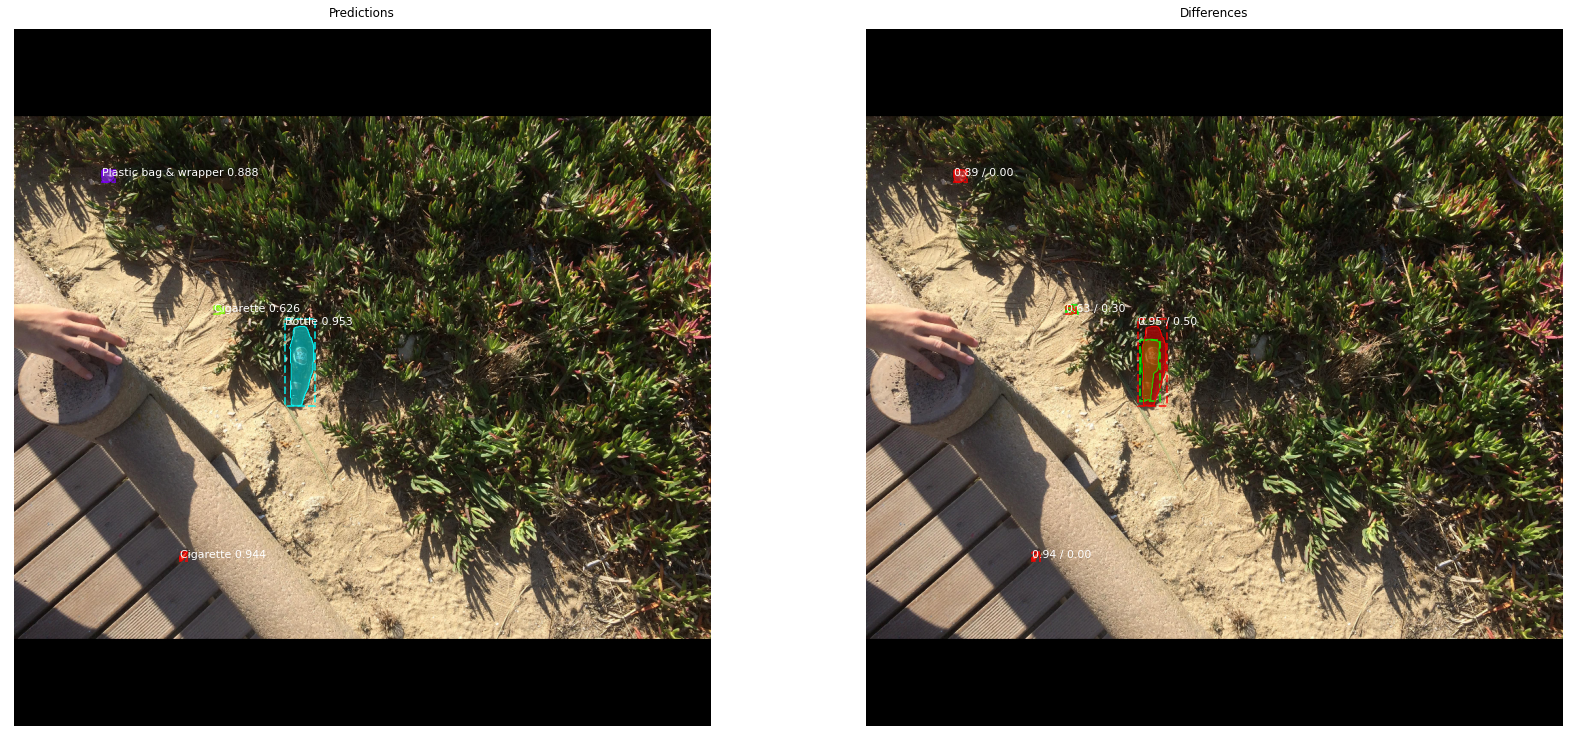

In [ ]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]

print("image ID: {}.{} ({}) {}\n".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
print("Ground-truth class:")
for ids in gt_class_id:
  print(dataset.class_names[ids])
print("\n")

# Run object detection
results = model.detect([image], verbose=0)

# Display results
ax = get_ax(1,2)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax[0],
                            title="Predictions", figsize=(10,10))

# Display differences between Ground-Truth and Predictions
visualize.display_differences(image, gt_bbox, gt_class_id, gt_mask,
                              r['rois'], r['class_ids'], r['scores'], r['masks'],
                              dataset.class_names, ax=ax[1], title="Differences")

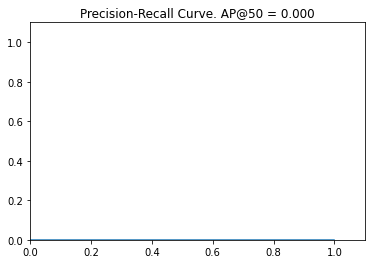

In [ ]:
# Draw precision-recall curve
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
visualize.plot_precision_recall(AP, precisions, recalls)

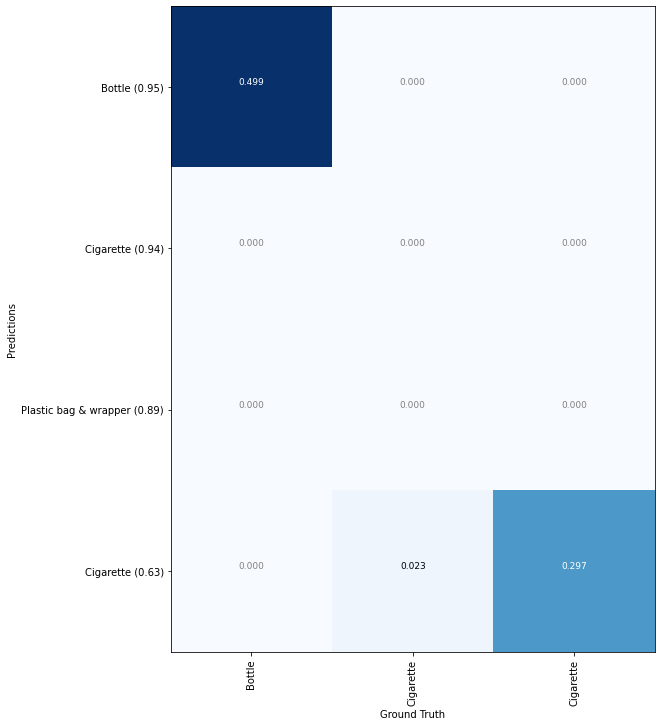

In [ ]:
# Grid of ground truth objects and their predictions
visualize.plot_overlaps(gt_class_id, r['class_ids'], r['scores'], overlaps, dataset.class_names)

### 4.3 Classification performance

We will simply iterate over the test dataset and observe the classification performance, with a bar plot and a confusion matrix

Answer questions as:
+ Did the model predict all the classes correctly?
+ Is the distribution of the class similar?

This help us to identify the problematic catgories and give us insight on what to improve for further models. 

We use a repository that takes as inupts the prediction of Mask_RCNN model, it is extremely convenient.

*(Be careful the execution over the dataset takes a while, (without GPU's) ~30 sec per images -> 300 images = 150 mintues)*

In [ ]:
%cd ./

/content


In [ ]:
!git clone https://github.com/Altimis/Confusion-matrix-for-Mask-R-CNN.git

Cloning into 'Confusion-matrix-for-Mask-R-CNN'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 79 (delta 35), reused 30 (delta 9), pack-reused 0
Unpacking objects: 100% (79/79), done.


In [ ]:
import os
os.chdir("/content/Confusion-matrix-for-Mask-R-CNN")
import utils as utils_extend

In [ ]:
import mrcnn.utils as utils

In [ ]:
APs = []
all_gt_classes=[]
all_pred_classes=[]
count_gt_annotations=np.array([])
count_pred_annotations=np.array([])

#ground-truth and predictions lists for confusion Matrix
gt_tot = np.array([])
pred_tot = np.array([])

for i, image_id in enumerate(dataset.image_ids):
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    gt_class_id = gt_class_id.tolist()
    all_gt_classes.extend(gt_class_id)
    count_gt_annotations = np.append(count_gt_annotations, len(gt_class_id))
    molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
    results = model.detect([image], verbose=0)
    r = results[0]

    # Tool for the confusion Matrix 
    gt, pred = utils_extend.gt_pred_lists(gt_class_id, gt_bbox, r['class_ids'], r['rois'])
    gt_tot = np.append(gt_tot, gt)
    pred_tot = np.append(pred_tot, pred)

    pred_class_id = r["class_ids"].tolist()
    all_pred_classes.extend(pred_class_id)
    count_pred_annotations = np.append(count_pred_annotations, len(r["class_ids"]))
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)


print("Number of images: ", len(dataset.image_ids))
print("Total objects: ", len(all_gt_classes))
print("Number of detected object: ", len(all_pred_classes))
print("Median annotation per images (GT): ", np.median(count_gt_annotations))
print("Average annotation per image (GT): ", np.average(count_gt_annotations))
print("Median annotation per images (detected): ", np.median(count_pred_annotations))
print("Average annotation per image (detected): ", np.average(count_pred_annotations))
print("\nmAP: ", np.mean(APs))



unique_id = list(set(all_gt_classes))
dict_freq={}
class_names=[]
for id in unique_id:
  class_names.append(dataset.class_names[int(id)])
dict_freq["class_names"]=class_names
gt_count=[]
for id in unique_id:
  count=0
  for gt_class in all_gt_classes:
    if gt_class==id:
      count+=1
  gt_count.append(count)
dict_freq["gt"]=gt_count
pred_count=[]
for id in unique_id:
  count=0
  for pred_class in all_pred_classes:
    if pred_class==id:
      count+=1
  pred_count.append(count)
dict_freq["pred"]=pred_count

assert len(dict_freq["class_names"])==len(dict_freq["gt"])==len(dict_freq["pred"]), 'Warnings: Dictionary uneven!'  

Number of images:  252
Total objects:  691
Number of detected object:  1235
Median annotation per images (GT):  1.0
Average annotation per image (GT):  2.742063492063492
Median annotation per images (detected):  4.0
Average annotation per image (detected):  4.900793650793651

mAP:  0.3851423681259326


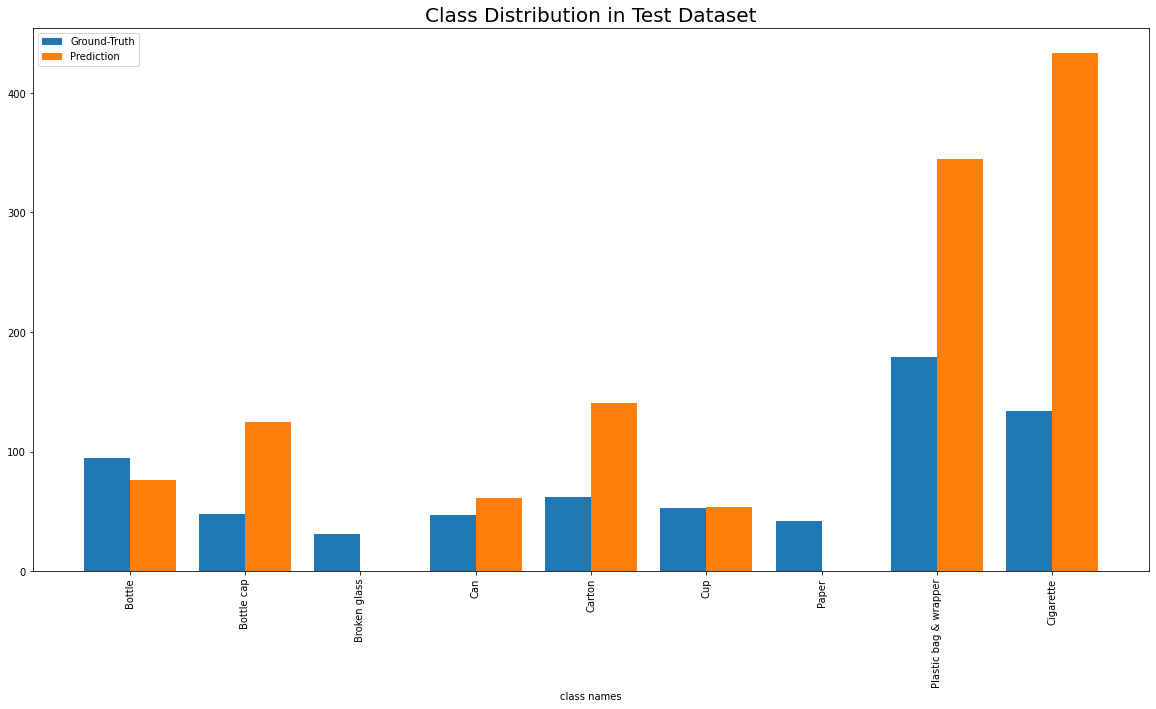

In [ ]:
# variables
x = dict_freq["class_names"]
gt = dict_freq["gt"]
pred = dict_freq["pred"]

# Bar plot
fig = plt.figure(figsize = (20, 10))

X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, gt, 0.4, label = 'Ground-Truth')
plt.bar(X_axis + 0.2, pred, 0.4, label = 'Prediction')

plt.xticks(X_axis, x, rotation=90)
plt.xlabel("class names")
plt.title("Class Distribution in Test Dataset", fontsize=20)
plt.legend()
plt.show()

### Confusion Matrix

Unfortunately, due to missing prediction in the prediction, we cannot compute the confusion matrix for the 28 categories, but works fine for 9 categories

In [ ]:
os.chdir("/content")

/content/Confusion-matrix-for-Mask-R-CNN/utils.py:280: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/content/Confusion-matrix-for-Mask-R-CNN/utils.py:281: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/content/Confusion-matrix-for-Mask-R-CNN/utils.py:283: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/content/Confusion-matrix-for-Mask-R-CNN/utils.py:284: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


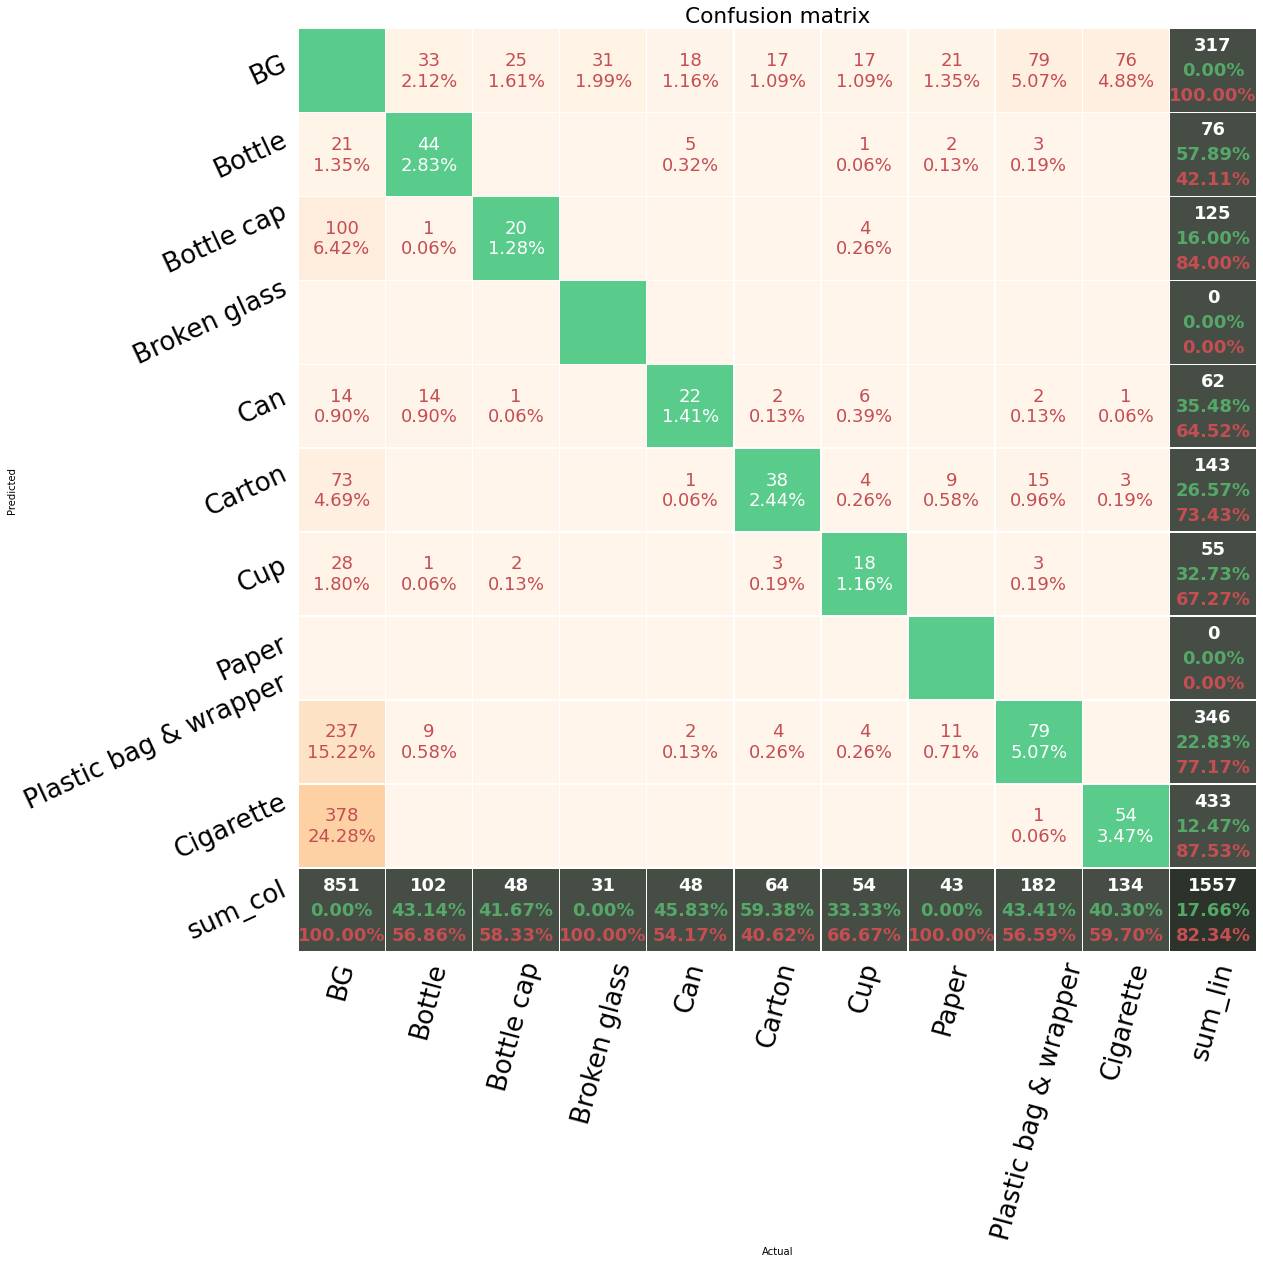

In [ ]:
## Plot confusion matirx for 9 classes
tp, fp, fn = utils_extend.plot_confusion_matrix_from_data(gt_tot, pred_tot,dataset.class_names, fz=18, figsize=(18,18), lw=0.5)
## Plot confusion matirx for 28 classes
# class_names = ["BG"] + dict_freq["class_names"]
# tp, fp, fn = utils_extend.plot_confusion_matrix_from_data(gt_tot, pred_tot,class_names, fz=18, figsize=(18,18), lw=0.5)

### 4.4 Detection/segmentation performance

The following metrics focus more on the overlapping performance of the model. Does the model detect the object shape correctly? The mAP score is already given above, here the code is faster because it compute for 50 documents only.

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 50 images. Increase for better accuracy.
image_ids = np.random.choice(dataset.image_ids, 50)     #CHANGE HERE for more or less documents
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset, config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)

print("mAP: ", np.mean(APs))


mAP:  0.41583571603894237


## 5. Test

Take a picture and run it with the model to see if the model detect correctly the trash.

In [ ]:
# Load a random image from the images folder
IMAGE_DIR = "/content/drive/MyDrive/project/DeepRecycling/random_images"
file_name = "IMG_9294.jpg"
image = skimage.io.imread(os.path.join(IMAGE_DIR, file_name))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'])

## Predicted mask

Sometimes the image has overlapping object, we can inspect the shape of the object to see if the algorithm correctly detected the object. 

In [ ]:
# Get predictions of mask head
mrcnn = model.run_graph([image], [
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
])

# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

detections               shape: (1, 100, 6)           min:    0.00000  max:   16.00000  float32
masks                    shape: (1, 100, 28, 28, 29)  min:    0.00000  max:    1.00000  float32
7 detections: ['Bottle' 'Bottle' 'Plastic bag & wrapper' 'Bottle cap' 'Carton' 'Can'
 'Plastic bag & wrapper']


In [ ]:
# Masks
det_boxes = utils.denorm_boxes(mrcnn["detections"][0, :, :4], image.shape[:2])
det_mask_specific = np.array([mrcnn["masks"][0, i, :, :, c] 
                              for i, c in enumerate(det_class_ids)])
det_masks = np.array([utils.unmold_mask(m, det_boxes[i], image.shape)
                      for i, m in enumerate(det_mask_specific)])
log("det_mask_specific", det_mask_specific)
log("det_masks", det_masks)

det_mask_specific        shape: (7, 28, 28)           min:    0.00001  max:    1.00000  float32
det_masks                shape: (7, 3024, 4032)       min:    0.00000  max:    1.00000  bool


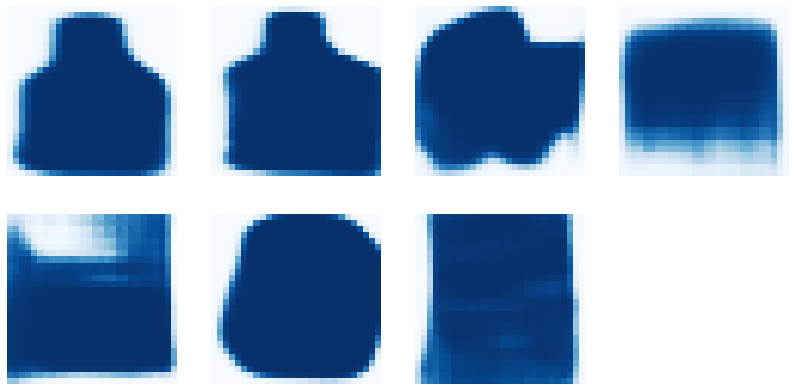

In [ ]:
display_images(det_mask_specific[:] * 255, cmap="Blues", interpolation="none")